In [ ]:
import numpy as np
import pandas as pd
import cv2
import keras
from numpy import random
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Activation
from keras.layers import MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
! pip install np_utils
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report ,confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import seaborn as sns
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=1a702178d02d093542db44f8163414c54f11fc0f7fc19782020d5f5630eff6c0
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Directory of train, validation and test

train_folder = "/content/drive/MyDrive/Chect_data/train"
valid_folder = "/content/drive/MyDrive/Chect_data/valid"
test_folder = "/content/drive/MyDrive/Chect_data/test"

In [ ]:
print("\n\n\t\tTraining Set")
print("\t  ========================\n")
train_c = []
for folder in os.listdir(train_folder):
    train_c.append(folder)
    print("\nTrain "+ folder + " Class: ", len(os.listdir(train_folder + '/' + folder)))

print("\n\n", train_c)

print("\n\n\t\tTesting Set")
print("\t  ========================\n")
test_c = []
for folder in os.listdir(test_folder):
    test_c.append(folder)
    print("\nTest "+ folder + " Class: ", len(os.listdir(test_folder + '/' + folder)))

print("\n\n", test_c)

print("\n\n\t\tValidation Set")
print("\t  ========================\n")
val_c = []
for folder in os.listdir(valid_folder):
    val_c.append(folder)
    print("\nValidation "+ folder + " Class: ", len(os.listdir(valid_folder + '/' + folder)))

print("\n\n", val_c, "\n")



		Training Set


Train normal Class:  148

Train squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  155

Train adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  195

Train large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  115


 ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa']


		Testing Set


Test squamous.cell.carcinoma Class:  90

Test normal Class:  54

Test adenocarcinoma Class:  120

Test large.cell.carcinoma Class:  51


 ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']


		Validation Set


Validation normal Class:  13

Validation squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  15

Validation large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  21

Validation adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  23


 ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0

In [ ]:
input_shape = (224,224,3)
num_class = 4

train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
val_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
)
test_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle = False,
)
validation_generator = val_datagen.flow_from_directory(
    valid_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
# Get list of class weights
class_weights_list = class_weight.compute_class_weight(
           class_weight='balanced',
            classes=np.unique(train_generator.classes),
            y=train_generator.classes)
# Get class labels
class_labels=np.unique(train_generator.classes)

# Put weights in dict with class label
class_weights = {}
for class_i in range(len(class_labels)):
     class_weights[class_labels[class_i]] = class_weights_list[class_i]

# Check
class_weights

{0: 0.7858974358974359,
 1: 1.3326086956521739,
 2: 1.035472972972973,
 3: 0.9887096774193549}

In [ ]:
# Modelling
# 1. VGG16
# 2. AlexNet
# 3. InceptionV3


In [ ]:
#ALEXNET

In [ ]:
modelResNet50 = ResNet50(weights = 'imagenet',
                     include_top = False,
                     input_shape = input_shape)

for layer in modelResNet50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
    modelResNet50,
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(.3),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dropout(.3),
    Dense(512, activation = 'relu'),
    Dropout(.3),
    Dense(256, activation = 'relu'),
    Dropout(.3),
    Dense(num_class, activation = 'softmax')
])


print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 2048)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
opt1 = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [ ]:
epochs = 50

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    class_weight=class_weights,
    verbose=1
)
test = test_generator
score = model.evaluate(test, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
20/20 [==============================] - 240s 11s/step - loss: 4.4990 - accuracy: 0.4160 - val_loss: 2.6687 - val_accuracy: 0.4167
Epoch 2/50
20/20 [==============================] - 13s 646ms/step - loss: 2.7698 - accuracy: 0.4845 - val_loss: 1.1719 - val_accuracy: 0.4861
Epoch 3/50
20/20 [==============================] - 13s 644ms/step - loss: 1.7667 - accuracy: 0.5171 - val_loss: 0.8672 - val_accuracy: 0.6111
Epoch 4/50
20/20 [==============================] - 13s 645ms/step - loss: 1.4231 - accuracy: 0.5416 - val_loss: 1.0747 - val_accuracy: 0.5278
Epoch 5/50
20/20 [==============================] - 13s 649ms/step - loss: 1.1740 - accuracy: 0.5481 - val_loss: 0.8466 - val_accuracy: 0.5694
Epoch 6/50
20/20 [==============================] - 12s 607ms/step - loss: 0.9797 - accuracy: 0.5824 - val_loss: 0.7726 - val_accuracy: 0.6111
Epoch 7/50
20/20 [==============================] - 12s 581ms/step - loss: 0.9609 - accuracy: 0.6003 - val_loss: 0.7784 - val_accuracy: 0.6528


In [ ]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities = model.predict(test_generator, steps=num_test_samples)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = test_generator.classes

report = classification_report(true_labels, predicted_labels)

print(report)

10/10 [==============================] - 3s 237ms/step
              precision    recall  f1-score   support

           0       0.74      0.90      0.82       120
           1       0.69      0.86      0.77        51
           2       1.00      0.98      0.99        54
           3       0.96      0.57      0.71        90

    accuracy                           0.81       315
   macro avg       0.85      0.83      0.82       315
weighted avg       0.84      0.81      0.81       315





Confusion Matrix:
 [[108  10   0   2]
 [  7  44   0   0]
 [  0   1  53   0]
 [ 30   9   0  51]]


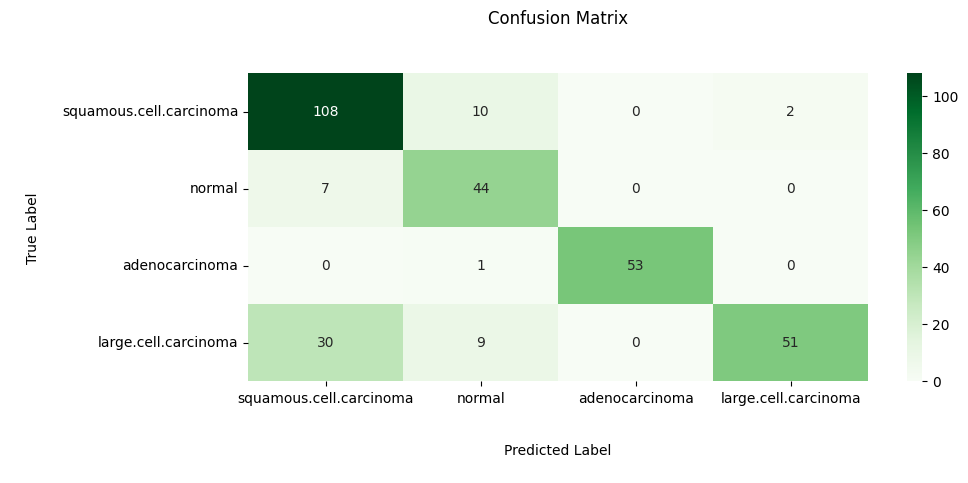

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)
print("\n\nConfusion Matrix:\n", cm)

plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels = test_c, yticklabels = test_c)
plt.xlabel('\n\nPredicted Label\n')
plt.ylabel('\nTrue Label\n')
plt.title('Confusion Matrix\n\n')
plt.show()

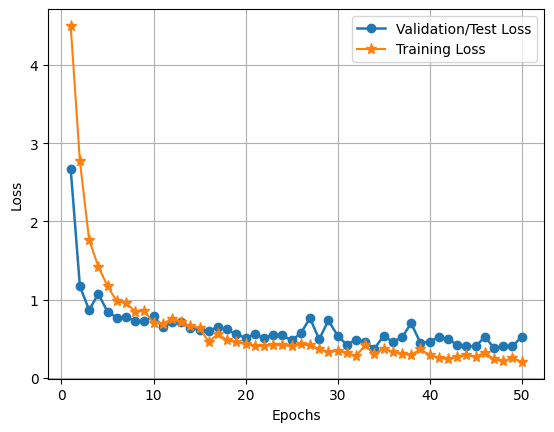

In [ ]:
#Plotting the loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.0)
plt.setp(line2, linewidth = 1.5, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

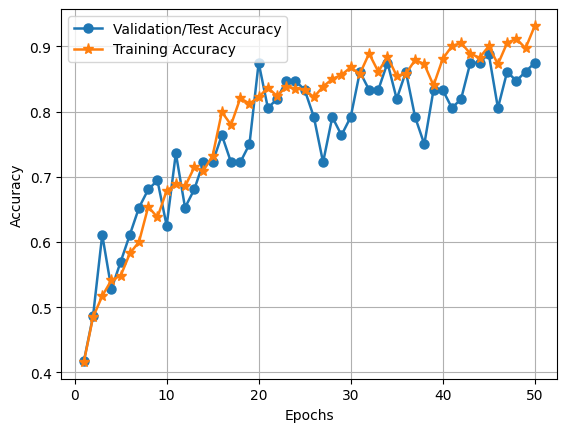

In [ ]:
#Plotting the accuracy charts
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.5)
plt.setp(line2, linewidth = 1.8, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()